In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import tree

In [2]:
from sqlalchemy import create_engine
from hold import connection_string

In [3]:
engine = create_engine(f'{connection_string}', encoding='iso-8859-1', connect_args={'connect_timeout': 10})

In [4]:
gtdDF = pd.read_sql_table('global_terrorism', con= engine)

In [5]:
casualties = gtdDF['nkill'] + gtdDF['nwound']
casualties.sum()

554384.0

In [6]:
gtdDF['casualties'] = gtdDF['nkill'] + gtdDF['nwound']
gtdDF.head()

,iyear,imonth,iday,date,country_txt,region_txt,provstate,city,latitude,longitude,...,weaptype1_txt,weapsubtype1_txt,weaptype2_txt,weapsubtype2_txt,kidhijcountry,ransom,nkill,nwound,index1,casualties
0,2000,1,1,2000-01-01,Namibia,Sub-Saharan Africa,Kavango,Muitjiku,-17.91,19.99,...,Firearms,Unknown Gun Type,None,None,None,NaN,0.0,7.0,1.0,7.0
1,2000,1,1,2000-01-01,Namibia,Sub-Saharan Africa,Kavango,Muitjiku,-17.91,19.99,...,Firearms,Unknown Gun Type,None,None,None,0.0,0.0,7.0,2.0,7.0
2,2000,1,1,2000-01-01,India,South Asia,Jammu and Kashmir,Udhampur,32.93,75.14,...,Firearms,Unknown Gun Type,None,None,None,NaN,1.0,2.0,3.0,3.0
3,2000,1,1,2000-01-01,Kosovo,Eastern Europe,Kosovo (Province),Peje,42.66,20.31,...,Explosives/Bombs/Dynamite,Unknown Explosive Type,None,None,None,NaN,0.0,1.0,4.0,1.0
4,2000,1,1,2000-01-01,Somalia,Sub-Saharan Africa,Banaadir,Mogadishu,2.11,45.39,...,Firearms,Unknown Gun Type,None,None,None,NaN,6.0,10.0,5.0,16.0


In [7]:
CountryCasualtiesDF = gtdDF[['index1','country_txt','casualties']]
CountryCasualtiesDF = CountryCasualtiesDF.reset_index()
CountryCasualtiesDF.head()

,index,index1,country_txt,casualties
0,0,1.0,Namibia,7.0
1,1,2.0,Namibia,7.0
2,2,3.0,India,3.0
3,3,4.0,Kosovo,1.0
4,4,5.0,Somalia,16.0


In [8]:
# Multiply the dummies by the casualties so that the regression works for casualties
CountryCasualties2DF = pd.get_dummies(CountryCasualtiesDF['country_txt']).mul(CountryCasualtiesDF['casualties'],0)
CountryCasualties2DF = CountryCasualties2DF.reset_index()
#RegionCasualties2DF = RegionCasualties2DF.rename(columns = {"index":"index1"})
CountryCasualties2DF.head()

,index,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,...,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza Strip,Western Sahara,Yemen,Yugoslavia,Zambia,Zimbabwe
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
CountryCasualtiesMergeDF = result = pd.merge(CountryCasualties2DF,CountryCasualtiesDF[['index','country_txt','casualties']],on='index')
CountryCasualtiesMergeDF.head()

,index,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,...,Venezuela,Vietnam,West Bank and Gaza Strip,Western Sahara,Yemen,Yugoslavia,Zambia,Zimbabwe,country_txt,casualties
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Namibia,7.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Namibia,7.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,India,3.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Kosovo,1.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Somalia,16.0


In [10]:
# Assign X (data) and y (target)
data = CountryCasualtiesMergeDF.drop(["index","country_txt",'casualties'], axis=1)
target = CountryCasualtiesMergeDF["country_txt"]
feature_names = data.columns

print(data.shape, target.shape)

(92700, 164) (92700,)


In [11]:
# Split the data into training and testing
### BEGIN SOLUTION
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)
### END SOLUTION

In [12]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7288457389428263

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7288457389428263

In [17]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.22903417063740647, 'Iraq'),
 (0.13530957219631295, 'Afghanistan'),
 (0.099533456764442, 'Pakistan'),
 (0.06776723423984983, 'India'),
 (0.04231349442602341, 'Philippines'),
 (0.04217833383608089, 'Thailand'),
 (0.03622306987129913, 'Somalia'),
 (0.030344841758597828, 'Nigeria'),
 (0.029483576186624533, 'Yemen'),
 (0.021913678639319523, 'Russia'),
 (0.020148829652522595, 'Algeria'),
 (0.018718130273412983, 'Egypt'),
 (0.018230509688918584, 'Libya'),
 (0.017810051967314795, 'Turkey'),
 (0.01769956262607558, 'Syria'),
 (0.01606166242785461, 'Colombia'),
 (0.013744193484685651, 'West Bank and Gaza Strip'),
 (0.011520218110803098, 'Sri Lanka'),
 (0.01023627206150033, 'Ukraine'),
 (0.009765608169167283, 'Bangladesh'),
 (0.008670998208642665, 'Israel'),
 (0.008183149202220996, 'Nepal'),
 (0.008012095191816731, 'Sudan'),
 (0.0067469368872415825, 'Democratic Republic of the Congo'),
 (0.005975897127617634, 'Kenya'),
 (0.005705945682930361, 'Lebanon'),
 (0.005063325484693883, 'Indonesia'),
 

In [26]:
RFCountryDF = pd.DataFrame(sorted(zip(rf.feature_importances_, feature_names), reverse=True), columns = ['Probability', 'Country'])
RFCountryDF.head(10)

,Probability,Country
0,0.229034,Iraq
1,0.135310,Afghanistan
2,0.099533,Pakistan
3,0.067767,India
4,0.042313,Philippines
5,0.042178,Thailand
6,0.036223,Somalia
7,0.030345,Nigeria
8,0.029484,Yemen
9,0.021914,Russia


In [27]:
pies = RFCountryDF['Country'].head(10)
pie_slices = RFCountryDF['Probability'].head(10)
colors = ["lightskyblue","orange","pink","yellowgreen","lightcoral","silver","yellow",
          "lightgreen","wheat","khaki"]          
explode = (0.1,0,0,0,0,0,0,0,0,0)

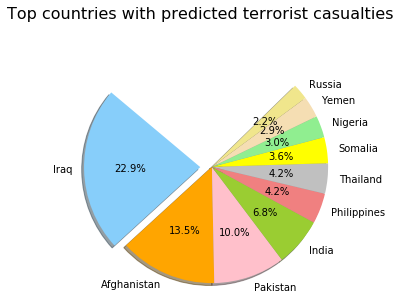

In [28]:
# Tell matplotlib to create a pie chart based upon the above data
plt.pie(pie_slices, explode=explode, labels=pies, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen

plt.savefig("../GTA/front_end/static/front_end/assets/visualizations/ML11_Countries_Casualties_Pie_RF")
plt.suptitle('Top countries with predicted terrorist casualties', size=16, y=1.12) 
plt.show()

In [29]:
RFTop10CountryDF = RFCountryDF.head(10)

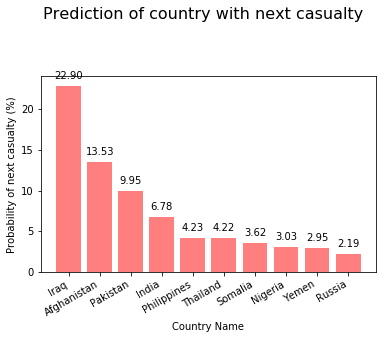

In [30]:
y_axis = RFTop10CountryDF['Probability']*100
x_axis = RFTop10CountryDF['Country']
fig, ax = plt.subplots()
# plot
ax.bar(x_axis, y_axis, color='r', alpha=0.5, align="center")

# Make space for and rotate the x-axis tick labels
fig.autofmt_xdate()

# Labels for x and y axes
plt.xlabel("Country Name")
plt.ylabel("Probability of next casualty (%)")

# Show the values of each probability on plot
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.
    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.2f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

# Call the function above. All the magic happens there.
add_value_labels(ax)

# Save an image of our chart and print the final product to the screen
plt.savefig("../GTA/front_end/static/front_end/assets/visualizations/ML11_Country_Casualties_Bar_RF")
# Title for the chart
plt.suptitle('Prediction of country with next casualty', size=16, y=1.12) 
plt.show()
